In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Mapeamento dos domínios

In [2]:
df = pd.read_csv('Data/processed_df.csv')

In [3]:
ci_map = {
    'cognitive': ['semantic_memory', 'verbal_fluency', 'memory_recall', 'temporal_orientation'],
    'psychologicao': ['depression_scale', 'sleep_quality'],
    'locomotor': ['gait_speed', 'balance'],
    'vitality': ['handgrip'],
    'sensory': ['distance_vision', 'near_vision', 'hearing_deficit']
}
ci_cols = []
[ci_cols.extend(value) for value in ci_map.values()]

ci_cols

['semantic_memory',
 'verbal_fluency',
 'memory_recall',
 'temporal_orientation',
 'depression_scale',
 'sleep_quality',
 'gait_speed',
 'balance',
 'handgrip',
 'distance_vision',
 'near_vision',
 'hearing_deficit']

### Limpando

In [4]:
df[ci_cols].isna().sum()

semantic_memory          581
verbal_fluency           343
memory_recall            328
temporal_orientation     328
depression_scale        1109
sleep_quality             27
gait_speed               572
balance                  975
handgrip                 539
distance_vision           25
near_vision               19
hearing_deficit           13
dtype: int64

In [5]:
df_clean = df.dropna(subset=ci_cols)

In [6]:
df_clean.isna().sum()

handgrip                   0
imc                       21
gait_speed                 0
balance                    0
hearing_deficit            0
distance_vision            0
near_vision                0
depression_scale           0
sleep_quality              0
temporal_orientation       0
memory_recall              0
semantic_memory            0
verbal_fluency             0
sexo                       0
regiao                     0
genero                     0
sexo_morador_1           873
sexo_morador_2          3154
sexo_morador_3          4896
sexo_morador_4          6063
sexo_morador_5          6727
sexo_morador_6          7013
sexo_morador_7          7136
sexo_morador_8          7197
sexo_morador_9          7229
sexo_morador_10         7244
sexo_morador_11         7254
sexo_morador_12         7255
sexo_morador_13         7260
sexo_morador_14         7260
papel_morador_1          873
papel_morador_2         3154
papel_morador_3         4896
papel_morador_4         6063
papel_morador_

In [7]:
df_clean.shape

(7261, 58)

- IC muda para os sexos
- IC muda para região do Brasil
- IC muda para etnias 
- IC muda para homens que moram com mulheres
- Variável de suporte das atividades (pergunta do telefone)


- ADL 
- IADL
- AADL

#### Normalizando

In [8]:
df_pca = df_clean[ci_cols]

# Initialize MinMaxScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df_pca)
df_scaled = pd.DataFrame(df_scaled, columns=df_pca.columns)
df_scaled

,semantic_memory,verbal_fluency,memory_recall,temporal_orientation,depression_scale,sleep_quality,gait_speed,balance,handgrip,distance_vision,near_vision,hearing_deficit
0,0.268574,0.661329,1.033982,0.547862,-1.098944,-0.634944,-0.382509,0.447357,-0.188283,-0.458097,-0.578452,-0.314051
1,0.268574,-0.956720,-1.467974,0.547862,-1.098944,-1.264169,-0.458157,0.447357,-0.053272,0.650651,0.532402,2.399006
2,-0.879904,-0.263271,-0.216996,0.547862,0.614116,0.623505,0.031664,0.447357,-1.167116,0.650651,1.643256,-0.314051
3,-2.028382,-0.494421,-0.216996,0.547862,-0.527924,-0.634944,0.415578,0.447357,-0.222036,-0.458097,-0.578452,1.042478
4,0.268574,-0.956720,-0.842485,0.547862,0.614116,0.623505,0.871358,-2.216241,-1.065857,1.759400,0.532402,-0.314051
...,...,...,...,...,...,...,...,...,...,...,...,...
7256,0.268574,0.892478,-0.216996,0.547862,1.185136,3.140403,-0.467613,-0.884442,-0.154530,-0.458097,-0.578452,-1.670580
7257,1.417052,1.354778,1.033982,0.547862,0.043096,-0.005719,-0.456266,-0.884442,-0.357048,0.650651,0.532402,1.042478
7258,0.268574,0.199029,0.408493,0.547862,-0.527924,-1.264169,-0.234995,0.447357,-0.660823,0.650651,-0.578452,-0.314051
7259,1.417052,0.892478,1.659471,0.547862,-1.669964,-0.634944,-0.093155,-0.884442,-0.357048,-0.458097,-0.578452,-0.314051


#### Observando correlações

#### Aplicando o PCA

- Para toda a capacidade intrinseca

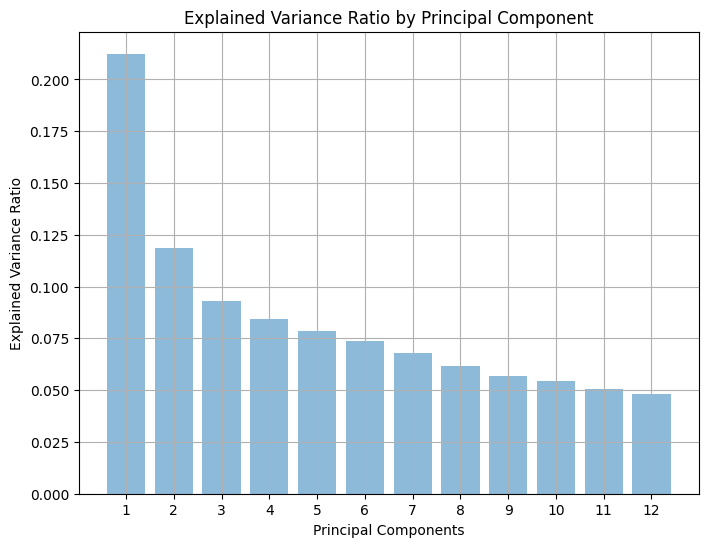

In [9]:
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA()  # We'll reduce the data to 2 dimensions

# Fit PCA to the data and transform the data
transformed_data = pca.fit_transform(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [12]:
pca.explained_variance_ratio_.cumsum()

array([0.2124258 , 0.33097425, 0.42400472, 0.50850273, 0.58701374,
       0.66073213, 0.7286256 , 0.79030605, 0.84716046, 0.90154975,
       0.95192176, 1.        ])

In [10]:
weights_pc1 = pca.components_[0]

In [13]:
weights_pc1

array([-0.3554264 , -0.37212491, -0.36181195, -0.28050561,  0.28920928,
        0.23137442,  0.20833703, -0.15296128, -0.31627628,  0.32543816,
        0.26418915,  0.21421872])

In [11]:
for i, c in enumerate(df_scaled.columns):
    print('='*40)
    print('variável: ' + c)
    print('peso: ' + str(weights_pc1[i]))
    print('='*40)



variável: semantic_memory
peso: -0.35542640253518926
variável: verbal_fluency
peso: -0.3721249074470795
variável: memory_recall
peso: -0.36181194649306286
variável: temporal_orientation
peso: -0.2805056105199063
variável: depression_scale
peso: 0.28920927678289987
variável: sleep_quality
peso: 0.2313744187594835
variável: gait_speed
peso: 0.20833702530679205
variável: balance
peso: -0.15296128187739633
variável: handgrip
peso: -0.31627628293461896
variável: distance_vision
peso: 0.32543815548360877
variável: near_vision
peso: 0.26418914905100865
variável: hearing_deficit
peso: 0.21421871886347038


### Aplicando o AUTOENCONDER

In [14]:
# Define dataset

df_autoencoder = df_clean[ci_cols]

In [15]:
df_autoencoder.dtypes

semantic_memory         float64
verbal_fluency          float64
memory_recall           float64
temporal_orientation    float64
depression_scale        float64
sleep_quality           float64
gait_speed              float64
balance                 float64
handgrip                float64
distance_vision         float64
near_vision             float64
hearing_deficit         float64
dtype: object

In [16]:
df_autoencoder

,semantic_memory,verbal_fluency,memory_recall,temporal_orientation,depression_scale,sleep_quality,gait_speed,balance,handgrip,distance_vision,near_vision,hearing_deficit
0,3.0,15.0,6.0,4.0,2.0,3.0,3.500,4.0,24.333333,2.0,2.0,2.0
1,3.0,8.0,2.0,4.0,2.0,2.0,3.300,4.0,25.666667,3.0,3.0,4.0
2,2.0,11.0,4.0,4.0,5.0,5.0,4.595,4.0,14.666667,3.0,4.0,2.0
3,1.0,10.0,4.0,4.0,3.0,3.0,5.610,4.0,24.000000,2.0,2.0,3.0
5,3.0,8.0,3.0,4.0,5.0,5.0,6.815,2.0,15.666667,4.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9403,3.0,16.0,4.0,4.0,6.0,9.0,3.275,3.0,24.666667,2.0,2.0,1.0
9404,4.0,18.0,6.0,4.0,4.0,4.0,3.305,3.0,22.666667,3.0,3.0,3.0
9405,3.0,13.0,5.0,4.0,3.0,2.0,3.890,4.0,19.666667,3.0,2.0,2.0
9407,4.0,16.0,7.0,4.0,1.0,3.0,4.265,3.0,22.666667,2.0,2.0,2.0


In [17]:


# Split the data into training and testing sets
X_train, X_test = train_test_split(df_autoencoder, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [26]:
def build_autoencoder(input_shape, architecture, output='decoder'):
    input_layer = Input(shape=input_shape, name='input')
    encoder_layer = input_layer
    arch_size = len(architecture)
    # Encoder layers
    for neurons in architecture[:arch_size//2]:
        encoder_layer = Dense(neurons, activation='relu')(encoder_layer)

    # Bottleneck layer
    encoder_output = Dense(architecture[arch_size//2], activation='linear', name="bottleneck")(encoder_layer)

    decoder_layer = encoder_output

    # Decoder layers
    for neurons in architecture[arch_size//2 + 1:]:
        decoder_layer = Dense(neurons, activation='relu')(decoder_layer)

    output_layer = Dense(input_shape[0], activation='linear')(decoder_layer)

    # Define autoencoder model
    if output ==  'decoder':
        autoencoder = Model(input_layer, output_layer)
    elif output ==  'encoder':
        autoencoder = Model(input_layer, encoder_output)
    # Compile the model
    autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

    return autoencoder

In [27]:
from sklearn.metrics import r2_score
def train_autoencoder(X_train_scaled, architecture):
    input_shape = X_train_scaled.shape[1:]
    autoencoder = build_autoencoder(input_shape, architecture)
    print(autoencoder.summary())
    autoencoder.fit(X_train_scaled, X_train_scaled, batch_size=32, epochs=50, verbose=1)

    decoded_data = autoencoder.predict(X_train_scaled)
    r2_scores = []
    for i in range(12):
        r2 = r2_score(X_train_scaled[:, i], decoded_data[:, i])  # Compare each output variable to its corresponding input variable
        r2_scores.append(r2)
    global_r2 = r2_score(X_train_scaled, decoded_data)
    return r2_scores, global_r2, autoencoder


In [28]:
architectures = [
    # (5, 3, 5), (5, 2, 5), (5, 1, 5), (10, 5, 2, 5, 10), (10, 5, 1, 5, 10), (10, 5, 3, 5, 10),
    (20, 10, 5, 2, 5, 10)
    
    
]  # Example architectures


train_r2_scores = []

for architecture in architectures:
    train_r2 = train_autoencoder(X_train_scaled, architecture)
    train_r2_scores.append(train_r2)


print("Training R2 Scores:")
for i, architecture in enumerate(architectures):
    print('='*40)
    print(f"Architecture {architecture}:")
    print(f'global: ', train_r2_scores[i][1])
    print('='*40)
    
    for j, feat in enumerate(df_autoencoder.columns):
        print(feat, train_r2_scores[i][0][j])
    print('='*40)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 12)             │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404 (1.58 KB)

 Trainable params: 404 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2392
Epoch 2/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0520
Epoch 3/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0319
Epoch 4/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0320
Epoch 5/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0314
Epoch 6/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0308
Epoch 7/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0270
Epoch 8/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0241
Epoch 9/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0237
Epoch 10/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0236
Epoch 11/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0232
Epoch 12/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0233
Epoch 13/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0231
Epoch 14/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0234
Epoch 15/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 12)             │           108 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550 (2.15 KB)

 Trainable params: 550 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1939
Epoch 2/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0311
Epoch 3/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0295
Epoch 4/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0289
Epoch 5/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0280
Epoch 6/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0276
Epoch 7/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0274
Epoch 8/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0273
Epoch 9/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0262
Epoch 10/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0249
Epoch 11/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0249
Epoch 12/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0242
Epoch 13/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0238
Epoch 14/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0232
Epoch 15/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [31]:
print("Training R2 Scores:")
for i, architecture in enumerate(architectures):
    print('='*40)
    print(f"Architecture {architecture}:")
    print(f'global: ', train_r2_scores[i][1])
    print('='*40)
    
    for j, feat in enumerate(df_autoencoder.columns):
        print(feat, train_r2_scores[i][0][j])
    print('='*40)

Training R2 Scores:
Architecture (5, 3, 5):
global:  0.4231588879311499
semantic_memory 0.6067731209834089
verbal_fluency 0.3300774210018911
memory_recall 0.3273622090034587
temporal_orientation 0.7431238035333598
depression_scale 0.535120095613689
sleep_quality 0.7513013639746565
gait_speed 0.04839175471035473
balance 0.05821633883536603
handgrip 0.18750159145974832
distance_vision 0.6190500007583615
near_vision 0.6699970241080786
hearing_deficit 0.2009919311913072
Architecture (5, 2, 5):
global:  0.20821442251797515
semantic_memory 0.3196000171199588
verbal_fluency 0.22171500849692116
memory_recall 0.22198785386341746
temporal_orientation 0.45279907224376625
depression_scale 0.2511002206489311
sleep_quality 0.16963670062792136
gait_speed 0.03713843309087428
balance 0.03356414338398561
handgrip 0.1398051876947456
distance_vision 0.31462879828917045
near_vision 0.24719052605608172
hearing_deficit 0.08940710869978341
Architecture (5, 1, 5):
global:  0.21004206905709735
semantic_memory 0

In [56]:
autoencoder = build_autoencoder((13,), (10, 5, 2, 5, 10), output='encoder')

encoded_data = autoencoder.predict(df_autoencoder)
encoded_df = pd.DataFrame(encoded_data, columns=['Latent Dimension 1', 'Latent Dimension 2'])


227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [61]:

exp_data = pd.concat([encoded_df, df_clean.reset_index(drop=True).drop(columns=ci_cols)], axis=1)

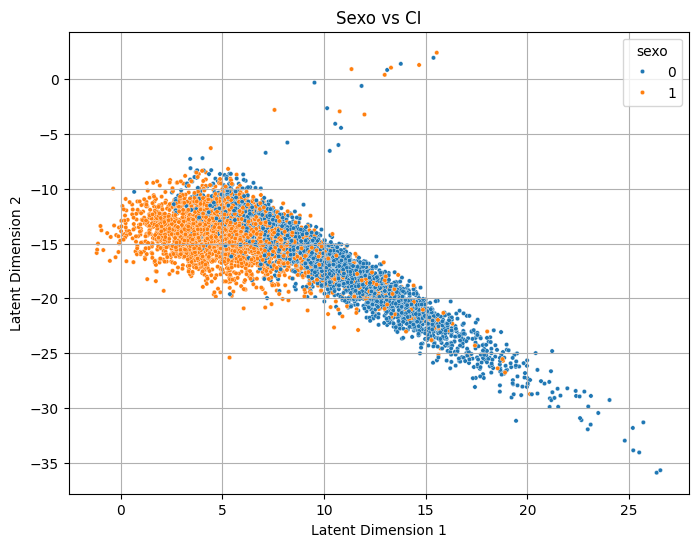

In [64]:
# Plot the encoded data in 2D using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Latent Dimension 1', y='Latent Dimension 2', data=exp_data, hue='sexo', s=10)
plt.title('Sexo vs CI')
plt.grid(True)
plt.show()

In [ ]:
# Plot the encoded data in 2D using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Latent Dimension 1', y='Latent Dimension 2', data=exp_data, hue='sexo', s=10)
plt.title('Sexo vs CI')
plt.grid(True)
plt.show()